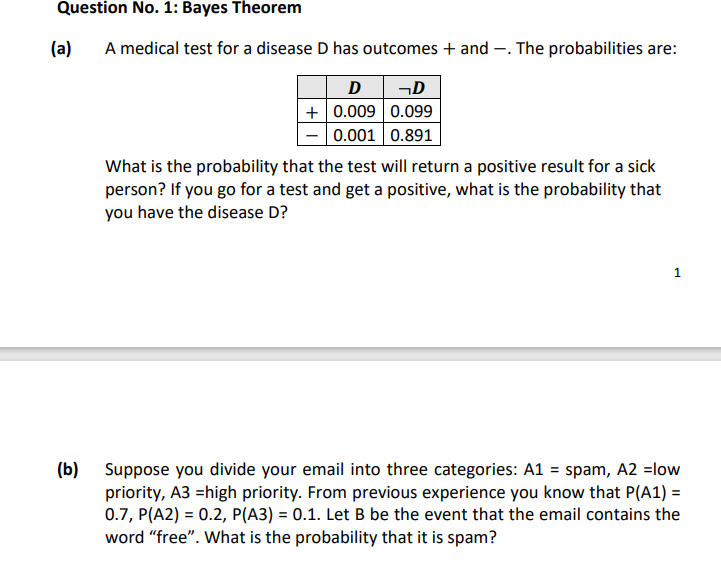

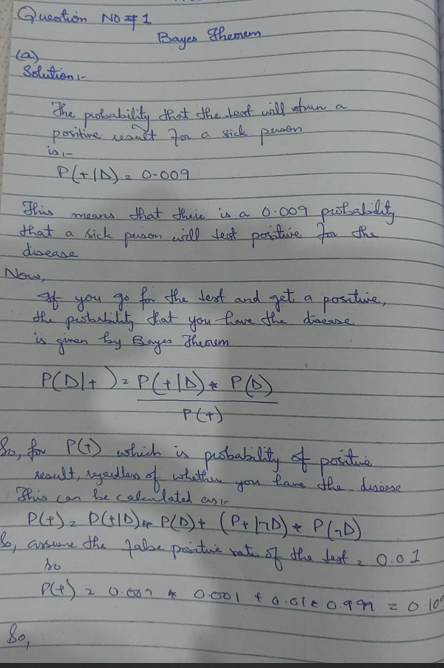

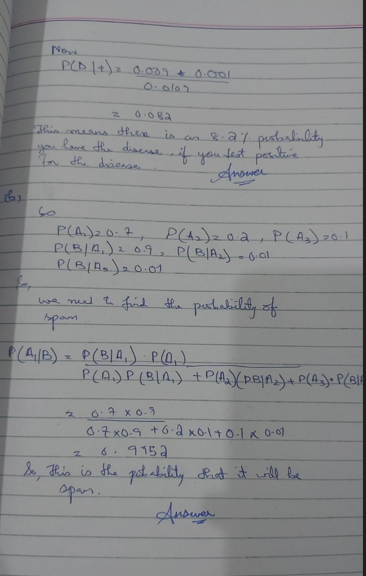

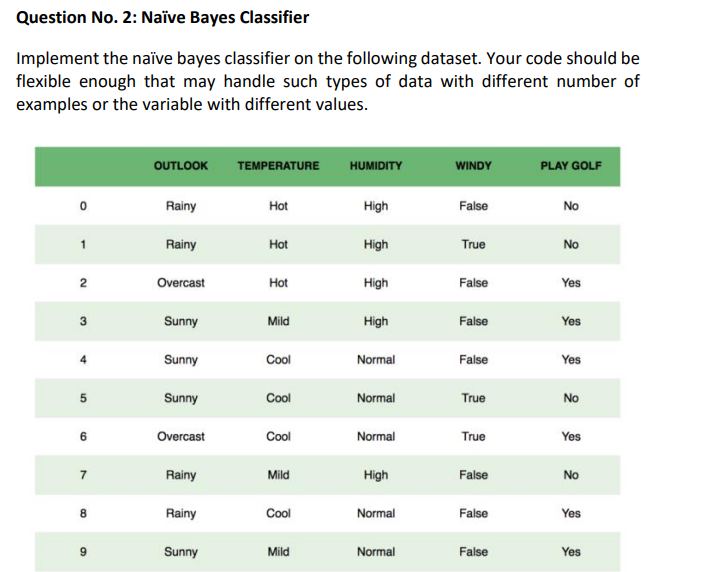

In [42]:
data = [
    ["Rainy", "Hot", "High", False, "No"],
    ["Rainy", "Hot", "High", True, "No"],
    ["Overcast", "Hot", "High", False, "Yes"],
    ["Sunny", "Mild", "High", False, "Yes"],
    ["Sunny", "Cool", "Normal", False, "Yes"],
    ["Sunny", "Cool", "Normal", True, "No"],
    ["Overcast", "Cool", "Normal", True, "Yes"],
    ["Rainy", "Mild", "High", False, "No"],
    ["Rainy", "Cool", "Normal", False, "Yes"],
    ["Sunny", "Mild", "Normal", False, "Yes"],
    ["Rainy", "Mild", "Normal", True, "Yes"],
    ["Overcast", "Mild", "High", True, "Yes"],
    ["Overcast", "Hot", "Normal", False, "Yes"],
    ["Sunny", "Mild", "High", True, "No"]
]

# Define feature names and label
feature_names = ["Outlook", "Temperature", "Humidity", "Windy"]
label_name = "Play Golf"

# Separate features and labels
features = [row[:-1] for row in data]
labels = [row[-1] for row in data]

# Function to calculate probabilities with Laplace smoothing
def calculate_probabilities(data, new_data_point):
    prob_no = 1
    prob_yes = 1

    for i in range(len(new_data_point)):
        # Convert the new_data_point value to string for comparison
        value = str(new_data_point[i])
        count_label_and_value_no = sum(1 for row in data if row[i] == value and row[-1] == "No")
        count_label_and_value_yes = sum(1 for row in data if row[i] == value and row[-1] == "Yes")

        # Laplace smoothing
        prob_no *= (count_label_and_value_no + 1) / (sum(1 for row in data if row[-1] == "No") + len(set(row[i] for row in data)))
        prob_yes *= (count_label_and_value_yes + 1) / (sum(1 for row in data if row[-1] == "Yes") + len(set(row[i] for row in data)))

    # Assume equal prior probabilities for "No" and "Yes"
    prior_probability_no = sum(1 for label in labels if label == "No") / len(labels)
    prior_probability_yes = sum(1 for label in labels if label == "Yes") / len(labels)

    # Multiply by prior probabilities
    prob_no *= prior_probability_no
    prob_yes *= prior_probability_yes

    return prob_no, prob_yes

# Function to predict the class using Maximum Rule
def predict_class_max_rule(data, new_data_point):
    # Calculate probabilities using MAP rule
    prob_no, prob_yes = calculate_probabilities(data, new_data_point)

    # Use the maximum rule for comparison
    predicted_class = "No" if prob_no > prob_yes else "Yes"

    return prob_no, prob_yes, predicted_class

# Define the new data point x'
new_data_point = ["Sunny", "Cool", "High", True]

# Make a prediction using Maximum Rule
prob_no, prob_yes, predicted_class_max = predict_class_max_rule(data, new_data_point)

# Display the results
print(f"P(Play Golf = No | x') = {prob_no:.4f}")
print(f"P(Play Golf = Yes | x') = {prob_yes:.4f}")
print(f"The predicted class for the new data point  is: {predicted_class_max}")


P(Play Golf = No | x') = 0.0034
P(Play Golf = Yes | x') = 0.0024
The predicted class for the new data point using Maximum Rule is: No
